In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [2]:
data_dir='/Volumes/HD/Climatologias/EN.4.2.2.l09/NC/'

In [7]:
files = []
for iy in range(1950,2024):
    for im in range(1,13):
        files.append(data_dir+"EN.4.2.2.f.analysis.l09.%04d%02d.nc"%(iy,im))

In [8]:
data = xr.open_mfdataset(files)

In [9]:
data

<xarray.Dataset> Size: 13GB
Dimensions:                          (depth: 42, lat: 173, lon: 360, time: 120,
                                      bnds: 2)
Coordinates:
  * depth                            (depth) float32 168B 5.022 ... 5.35e+03
  * lat                              (lat) float32 692B -83.0 -82.0 ... 89.0
  * lon                              (lon) float32 1kB 1.0 2.0 ... 359.0 360.0
  * time                             (time) datetime64[ns] 960B 1950-01-16T12...
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float64 3GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    salinity                         (time, depth, lat, lon) float64 3GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    temperature_uncertainty          (time, depth, lat, lon) float64 3GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    salinity_uncertainty             (time, depth, lat, lon) float64 3GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    temperature_observation_weights  (time, depth, lat, lon) float32 1GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    salinity_observation_weights     (time, depth, lat, lon) float32 1GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    time_bnds                        (time, bnds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    depth_bnds                       (time, depth, bnds) float32 40kB dask.array<chunksize=(1, 42, 2), meta=np.ndarray>
Attributes: (12/22)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...

In [10]:
EN = data.drop_vars("temperature_uncertainty").drop_vars("salinity_uncertainty")
EN = EN.drop_vars("time_bnds").drop_vars("depth_bnds")
EN = EN.drop_vars("temperature_observation_weights").drop_vars("salinity_observation_weights")

In [11]:
EN

<xarray.Dataset> Size: 5GB
Dimensions:      (depth: 42, lat: 173, lon: 360, time: 120)
Coordinates:
  * depth        (depth) float32 168B 5.022 15.08 25.16 ... 5.051e+03 5.35e+03
  * lat          (lat) float32 692B -83.0 -82.0 -81.0 -80.0 ... 87.0 88.0 89.0
  * lon          (lon) float32 1kB 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0
  * time         (time) datetime64[ns] 960B 1950-01-16T12:00:00 ... 1959-12-1...
Data variables:
    temperature  (time, depth, lat, lon) float64 3GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
    salinity     (time, depth, lat, lon) float64 3GB dask.array<chunksize=(1, 21, 87, 180), meta=np.ndarray>
Attributes: (12/22)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...

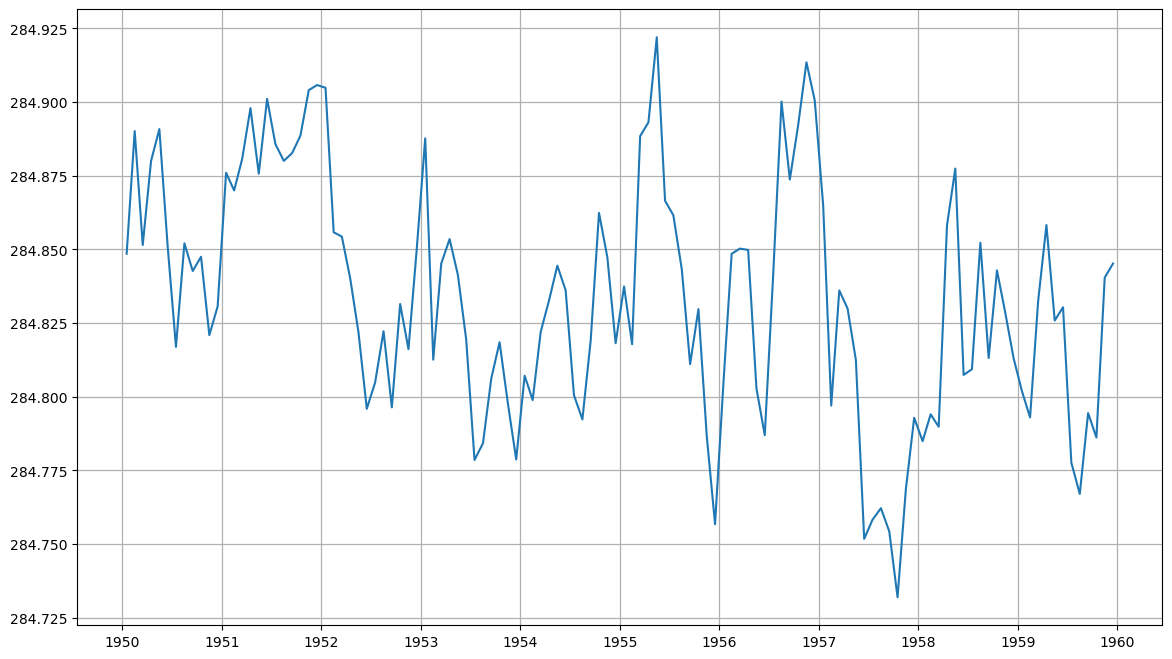

In [12]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(EN.time,
        EN.temperature.sel(lat=slice( -60, 60)).mean(dim='lat').mean(dim='lon').sel(depth=200,method="nearest"),
        label = '200')
ax.grid(linestyle='-', linewidth=.9);

In [9]:
EN.to_netcdf('EN_Global_Jan1950_Dic2023.nc')

KeyboardInterrupt: 

In [ ]:
EN